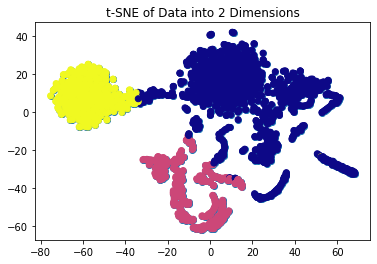

In [7]:
#OPTICS
import pandas as pd

df = pd.read_excel(r"./../Data/RawData.xlsx")

import pandas as pd
from sklearn.preprocessing import StandardScaler

def tSNE(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    #t-SNE code

    from sklearn.manifold import TSNE

    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(df_scaled)
    return tsne_result

tsne_result = tSNE(df)

import matplotlib.pyplot as plt

plt.scatter(tsne_result[:,0], tsne_result[:,1])
plt.title("t-SNE of Data into 2 Dimensions")

from sklearn.cluster import OPTICS, cluster_optics_dbscan


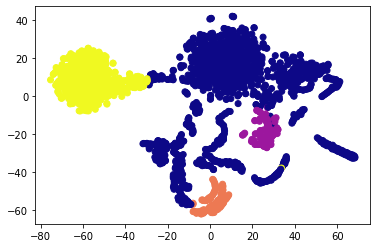

In [11]:
mycluster = OPTICS(min_samples = 75).fit(tsne_result)
mycluster.labels_

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = mycluster.labels_, cmap = "plasma")


/Users/hannahporta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


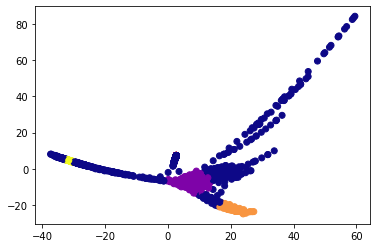

In [15]:
from sklearn.manifold import Isomap

def IsomapDR(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    n_components=2

    isomap = Isomap(n_components)
    isomap_result = isomap.fit_transform(df_scaled)
    return isomap_result

isomap_result = IsomapDR(df)


from sklearn.cluster import OPTICS, cluster_optics_dbscan
mycluster = OPTICS(min_samples = 50).fit(isomap_result)
mycluster.labels_

plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c = mycluster.labels_, cmap = "plasma")

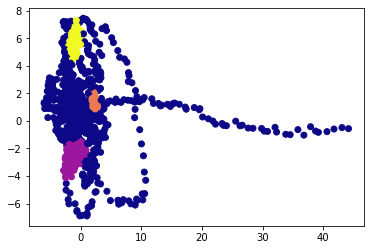

In [18]:
import numpy as np
from sklearn.decomposition import PCA

mydata = pd.read_excel(r"./../Data/RawData.xlsx")

myscaled = StandardScaler().fit(mydata)

mydata_scaled = myscaled.transform(mydata)

mdscaled_array = np.array(mydata_scaled)

mypca = PCA(n_components=2)
pca_result = mypca.fit_transform(mdscaled_array)

from sklearn.cluster import OPTICS, cluster_optics_dbscan
mycluster = OPTICS(min_samples = 25).fit(pca_result)
mycluster.labels_

plt.scatter(pca_result[:, 0], pca_result[:, 1], c = mycluster.labels_, cmap = "plasma")

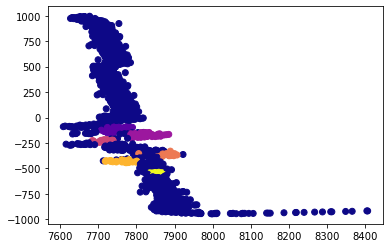

In [26]:
from sklearn.decomposition import TruncatedSVD as SVD


SVD = SVD(n_components=2)
SVD_results = SVD.fit(df)
SVD_results = SVD.transform(df)

from sklearn.cluster import OPTICS, cluster_optics_dbscan
mycluster = OPTICS(min_samples = 25).fit(SVD_results)
mycluster.labels_

plt.scatter(SVD_results[:, 0], SVD_results[:, 1], c = mycluster.labels_, cmap = "plasma")
